# API Demo
This notebook demonstrates usage of the craterfind API using a minimal python app. The first cell contains the code that will do the necessary things.

In [1]:
import json
import subprocess

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.patches import Circle

def load_image(path='./data/0.png'):
    img = (imread(path)*255).astype(np.uint8)
    return img

def prepare_image(img):
    img = img.flatten()
    return img

def prepare_request(array):
    base_url = "http://localhost:8501/v1/models/craters:predict"
    data = {
        "instances":[array.tolist()]
    }
    data_json = json.dumps(data)
    formatted = f"curl -d '{data_json}' -X POST {base_url}"
    return formatted

def make_request(request_string):
    response = subprocess.check_output(request_string, shell=True).decode()
    response_data = eval(response)
    return response_data
    

def plot_prediction(img, prediction):
    x,y,r = prediction
    fig, ax = plt.subplots(1)
    prediction = Circle(xy=(x,y), radius=r, fill=False)
    ax.add_artist(prediction)
    ax.imshow(img, cmap='Greys_r')

# Start with an Image
The model only takes pixels as an input. The annotator-provided crater location is implied to be in the center of the input image. This POC just deals with images of 32x32 pixels, like the following:

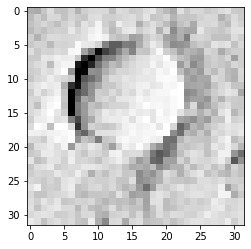

In [2]:
#randomly select an image from test data
n = np.random.randint(300)
#load image and convert to integer pixel values
img = load_image(f'./data/{n}.png')
plt.imshow(img, cmap='Greys_r');

# Transform Pixels
The raw pixel data needs to be flattened into a single vector.

In [3]:
#this function does the transformation
array = prepare_image(img)

#inspect resulting data:
print("Shape of image data: ", array.shape)

Shape of image data:  (1024,)


# Form Request
The API can be hit with a POST request and json body. The curl format would be:

`curl -d '{"instances":[[pixels]]}' -X POST http://localhost:<ip>/v1/models/craters:predict`

This is done here:

In [4]:
curl_request = prepare_request(array)
#see what it looks like:
print(curl_request)

curl -d '{"instances": [[148, 144, 170, 198, 167, 165, 184, 151, 180, 189, 192, 191, 162, 196, 191, 176, 181, 197, 208, 175, 157, 144, 201, 172, 191, 189, 176, 182, 193, 204, 176, 174, 157, 180, 161, 191, 189, 167, 187, 176, 170, 196, 200, 180, 181, 186, 192, 198, 182, 207, 170, 175, 187, 153, 173, 169, 171, 184, 192, 189, 150, 169, 195, 177, 165, 177, 190, 177, 162, 184, 195, 168, 205, 189, 233, 180, 165, 221, 197, 202, 148, 179, 199, 182, 159, 137, 164, 177, 145, 192, 189, 193, 170, 158, 199, 185, 157, 175, 163, 178, 183, 180, 213, 185, 202, 220, 237, 189, 157, 178, 210, 215, 178, 194, 205, 150, 192, 118, 150, 143, 142, 211, 181, 176, 170, 184, 205, 206, 180, 151, 177, 195, 193, 189, 191, 195, 203, 232, 244, 225, 174, 162, 170, 137, 142, 174, 192, 180, 139, 130, 148, 108, 185, 189, 183, 166, 166, 165, 197, 181, 172, 185, 183, 157, 186, 185, 190, 246, 215, 210, 185, 111, 75, 76, 106, 103, 145, 181, 217, 196, 149, 119, 124, 131, 162, 177, 168, 207, 197, 206, 166, 191, 199, 173, 187, 18

# Send Request, Parse Response
Make sure you have the [service running on your system](https://github.com/alliedtoasters/craterfind) before running the following cell or making a request.

In [5]:
response = make_request(curl_request)
#response contains x, y, and r predictions for crater.
print(response)

{'predictions': [[13.8767347, 12.4689255, 8.4121809]]}


# Plot Prediction

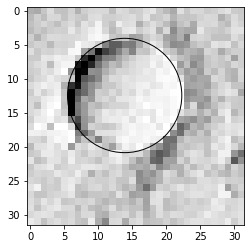

In [6]:
prediction = response['predictions'][0]
plot_prediction(img, prediction)